In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
test_prep = df[df["test preparation course"] == "completed"]
no_test_prep = df[df["test preparation course"] == "none"]


In [15]:
len(test_prep)

358

In [16]:
len(no_test_prep)

642

In [17]:
def one_bootstrap_mean_difference(subject):
    resampled_test_prep = test_prep.sample(n=100)
    resampled_no_test_prep = no_test_prep.sample(n=100)
    test_prep_mean = np.mean(resampled_test_prep[subject])
    no_test_prep_mean = np.mean(resampled_no_test_prep[subject])
    return test_prep_mean - no_test_prep_mean

In [18]:
num_repititions = 10000
bstrap_means = np.array([])
for i in np.arange(num_repititions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean_difference("math score"))

In [19]:
np.min(bstrap_means)

-2.8700000000000045

In [20]:
np.max(bstrap_means)

13.569999999999993

array([[<AxesSubplot:title={'center':'Boostrap Sample Mean'}>]],
      dtype=object)

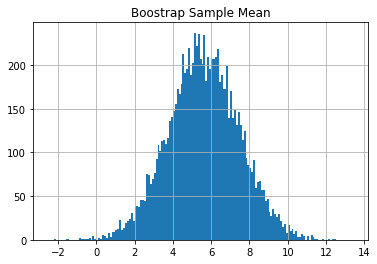

In [28]:
resampled_means = pd.DataFrame({"Boostrap Sample Mean": bstrap_means})
mean_bins = np.arange(-2.5, 13.5, 0.1)
resampled_means.hist(bins=mean_bins)

In [29]:
np.percentile(bstrap_means, 2.5)

2.010000000000005

In [30]:
np.percentile(bstrap_means, 97.5)

9.279999999999994

We are 95% confident that the true difference in mean math scores between those who completed a test preparation course and those who didn't is between 2.010000000000005 and 9.279999999999994